# Projeto 2

### Dependencias

In [1]:
import time
import numpy as np
import mne
from mne.time_frequency import psd_welch as psd
import matplotlib.pyplot as plt

### Configuração

In [2]:
sample_rate = 256
buffer_size_in_secs = 3
update_after_secs = 1

### Carregando base de dados

- Removendo dados faltantes

In [19]:
eeg_data = []

i = 0
j = 0
# with open("OpenBCI-RAW-2019-06-07_00-37-39.txt") as data:
# with open("OpenBCI-RAW-2019-06-07_01-09-36.txt") as data:
with open("OpenBCI-RAW-2019-06-07_14-21-59.txt") as data:
    # Ignorando cabecalho do arquivo
    for i in range(6):
        data.readline()
    
    # lendo dados
    one_sec_data = []
    last_index = 0
    
    for line in data:
        line_tok = line.split(", ")
        index = int(line_tok[0])
        
        if (last_index > index):
            i += 1
            if(len(one_sec_data) == sample_rate):
                j += 1
                eeg_data += one_sec_data
            one_sec_data = []
            
        last_index = index
        one_sec_data.append(list(map(lambda n : float(n), line_tok[1:7])))

### Convertendo um valor para uma escala entre 0 e 100

In [4]:
def scala100(maxValue, minValue):
    return minValue*100/maxValue

### Definindo função para realizar o processamento

In [12]:
def process(raw, tmin, tmax):
    bands = [0, 0, 0, 0]
    
    alpha, _freqs = psd(raw, tmin=tmin, tmax=tmax, fmin=8, fmax=12, verbose=False)
    bands[0]= np.average(alpha)
          
    theta, _freqs = psd(raw, tmin=tmin, tmax=tmax, fmin=5, fmax=7, verbose=False)
    bands[1]= np.average(theta)
    
    beta, _freqs = psd(raw, tmin=tmin, tmax=tmax, fmin=12, fmax=30, verbose=False)
    bands[2] = np.average(beta)
    
    gamma, _freqs = psd(raw, tmin=tmin, tmax=tmax, fmin=25, fmax=100, verbose=False)
    bands[3] = np.average(gamma)
    
    maxIndex = np.argmax(bands)
    
    if (maxIndex == 0):
        secondMaxIndex = np.argmax(bands[1:])+1
        maxValue = bands[maxIndex]
        minValue = bands[secondMaxIndex]
        print(scala100(maxValue, minValue))
    else:
        print(0)
        

## Aplicando bandpass aos dados

In [20]:
%matplotlib inline  

np_data = np.array(eeg_data).T
info = mne.create_info(ch_names=("po3", "po4", "p8", "o1", "o2", "p7"), sfreq=sample_rate, ch_types=["eeg" for i in range(6)])

raw = mne.io.RawArray(np_data, info)
raw.filter(l_freq=5, h_freq=50)
raw.filter(l_freq=5, h_freq=50)
raw.filter(l_freq=5, h_freq=50)

Creating RawArray with float64 data, n_channels=6, n_times=60160
    Range : 0 ... 60159 =      0.000 ...   234.996 secs
Ready.
Setting up band-pass filter from 5 - 50 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 12.5 Hz
Filter length of 423 samples (1.652 sec) selected
Setting up band-pass filter from 5 - 50 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 12.5 Hz
Filter length of 423 samples (1.652 sec) selected
Setting up band-pass filter from 5 - 50 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 12.5 Hz
Filter length of 423 samples (1.652 sec) selected


<RawArray  |  None, n_channels x n_times : 6 x 60160 (235.0 sec), ~2.8 MB, data loaded>

## Plotar janelas de exemplo onde o alpha é a maior frequencia

- entre 22 segundos e 25

Effective window size : 1.000 (s)


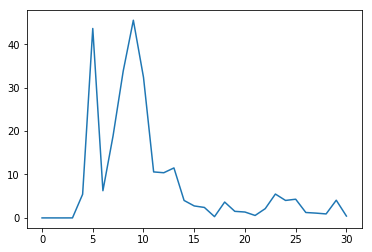

In [7]:
psds, freqs = psd(raw, tmin=22, tmax=25, fmax=30)
psd_Average = np.average(psds, axis=0) ** 2
plt.plot(freqs, psd_Average)
plt.show()

- entre 44 segundos e 47

Effective window size : 1.000 (s)


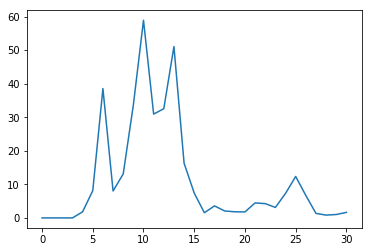

In [8]:
psds, freqs = psd(raw, tmin=44, tmax=47, fmax=30)
psd_Average = np.average(psds, axis=0) ** 2
plt.plot(freqs, psd_Average)
plt.show()

- entre 45 segundos e 48

Effective window size : 1.000 (s)


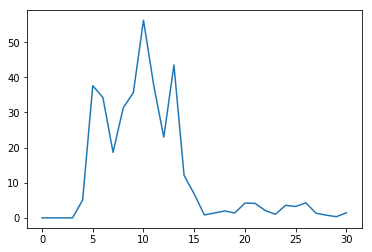

In [9]:
psds, freqs = psd(raw, tmin=45, tmax=48, fmax=30)
psd_Average = np.average(psds, axis=0) ** 2
plt.plot(freqs, psd_Average)
plt.show()

- entre 46 segundos e 49

Effective window size : 1.000 (s)


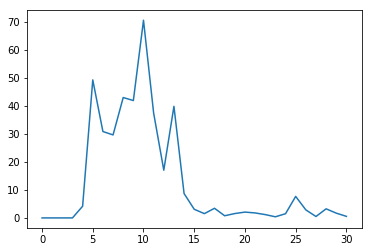

In [10]:
psds, freqs = psd(raw, tmin=46, tmax=49, fmax=30)
psd_Average = np.average(psds, axis=0) ** 2
plt.plot(freqs, psd_Average)
plt.show()

### Simulando transmissão dos dados

In [21]:
tmin = 0;
tmax = 0
extra_points_buff = 0
for data in eeg_data:
    time.sleep(1/sample_rate)
    tmax += 1
    # aplica janelamento
    if (tmax == sample_rate * buffer_size_in_secs):
        process(raw, tmin/sample_rate, tmax/sample_rate)
    elif (tmax > sample_rate * buffer_size_in_secs):
        tmin += 1
        extra_points_buff += 1
        if (extra_points_buff == sample_rate * update_after_secs):
            process(raw, tmin/sample_rate, tmax/sample_rate)
            extra_points_buff = 0

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
96.62849495528626
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
89.7249011596228
69.19410549500932
65.05541501761722
0
0
0
67.41708710917034
0
81.9767673463966
77.59652258980086
0
95.59095964013213
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
75.2832154366019
77.76033526672404
55.52722295686768
96.60746805294679
85.95303575313615
0
95.48601633492314
91.37155728151365
61.768535721967766
78.48474549101036
0
0
0
64.54219128355484
71.00023245705195
0
0
0
0
90.46254252615934
96.21095528239049
88.55788206586779
76.68418715331872
0
0
0
81.0634349703998
48.339302823153815
43.48907657937766
57.592433143144014
46.97335355486332
39.4719910645751
36.612328830427685
0
97.9400877021022
0
62.46794151000519
68.8768139671595
83.6515142769354
0
0
0
51.24181744084485
51.68313641810447
56.8821118365967
95.62917688291608
0
0